# Task 1

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline


# #Test image
# img = mpimg.imread('focus1.tif')
# h, w = original_shape = tuple(img.shape)
# plt.imshow(img,cmap="gray")

1.

a)Function for creating 5 level Gaussian Laplace Pyramids

In [2]:
#Gauss Pyramid
def applyGauss(img,h,w):
    m1 = np.zeros((h+2,w+2))
    m2 = np.zeros((h+2,w+2)) 
    m3 = np.zeros((h+2,w+2))
    m4 = np.zeros((h+2,w+2)) 
    m5 = np.zeros((h+2,w+2))
        
    for i in range(h):
        for j in range(w):
            m1[i][j] = img[i-(i%2)][j-(j%2)][0]
            m2[i][j] = img[i-(i%4)][j-(j%4)][0]
            m3[i][j] = img[i-(i%8)][j-(j%8)][0]
            m4[i][j] = img[i-(i%16)][j-(j%16)][0]
            m5[i][j] = img[i-(i%32)][j-(j%32)][0]
    
    return m1,m2,m3,m4,m5

#img = applyGauss(applyGauss(img,h,w) ,h,w) 
# m1,m2,m3,m4,m5 = applyGauss(img,h,w) 
# plt.imshow(m3,cmap="gray")

In [3]:
#Laplace Pyramid
def generateLaplace(img,m1,m2,m3,m4,m5):
    h, w, d = original_shape = tuple(img.shape)
    l1 = np.zeros((h+2,w+2))
    l2 = np.zeros((h+2,w+2)) 
    l3 = np.zeros((h+2,w+2))
    l4 = np.zeros((h+2,w+2)) 
    l5 = np.zeros((h+2,w+2)) 
    
    for i in range(h):
        for j in range(w):
            l1[i][j] = m1[i][j] - img[i][j][0]
            l2[i][j] = m2[i][j] - m1[i][j]
            l3[i][j] = m3[i][j] - m2[i][j]
            l4[i][j] = m4[i][j] - m3[i][j]
            l5[i][j] = m5[i][j] - m4[i][j]
    
    return l1,l2,l3,l4,l5

b) Function to Reconstruct image from Laplace

In [4]:
def reconstruct(m1,l1,l2,l3,l4,l5):
    h, w = original_shape = tuple(m1.shape)
    img_new = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            img_new[i][j] = l1[i][j] + l2[i][j] + l3[i][j] + l4[i][j] + l5[i][j]
    
    return img_new

2. Gaussian Laplace for Mandrill and Toucan Images

In [5]:
#Get Mandrill and Toucan images
img_m = mpimg.imread('mandril.tif')
hm, wm, dm = original_shape = tuple(img_m.shape)

img_t = mpimg.imread('toucan.tif')
ht, wt, dm = original_shape = tuple(img_t.shape)

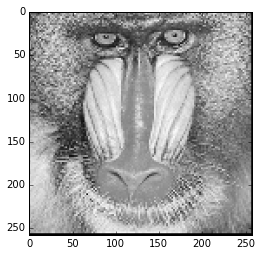

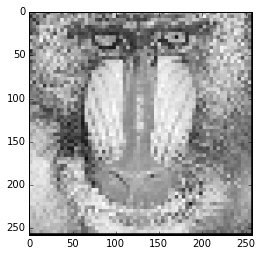

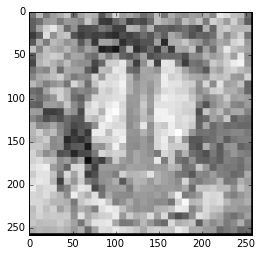

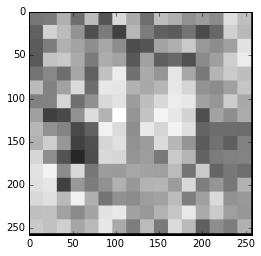

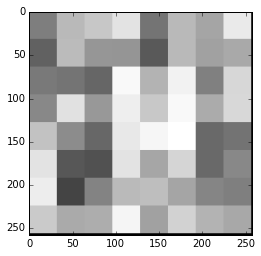

In [6]:
#Apply Gaussian to Mandrill Image 
md1,md2,md3,md4,md5 = applyGauss(img_m,hm,wm)
plt.figure(1)
plt.imshow(md1,cmap="gray")
plt.figure(2)
plt.imshow(md2,cmap="gray")
plt.figure(3)
plt.imshow(md3,cmap="gray")
plt.figure(4)
plt.imshow(md4,cmap="gray")
plt.figure(5)
plt.imshow(md5,cmap="gray")

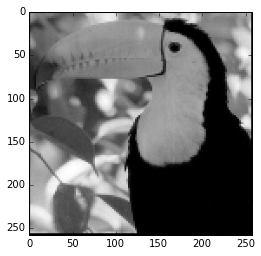

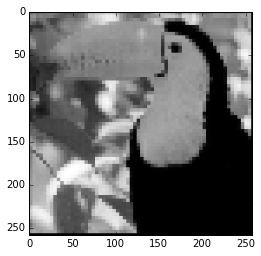

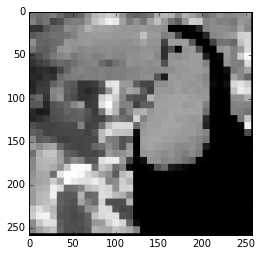

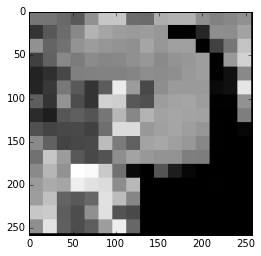

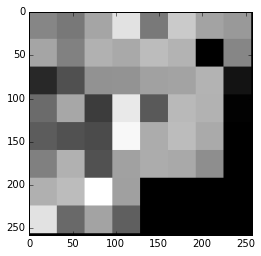

In [7]:
#Apply Gaussian to Toucan Image 
td1,td2,td3,td4,td5 = applyGauss(img_t,ht,wt)
plt.figure(1)
plt.imshow(td1,cmap="gray")
plt.figure(2)
plt.imshow(td2,cmap="gray")
plt.figure(3)
plt.imshow(td3,cmap="gray")
plt.figure(4)
plt.imshow(td4,cmap="gray")
plt.figure(5)
plt.imshow(td5,cmap="gray")

#3)Reconstructing the Images

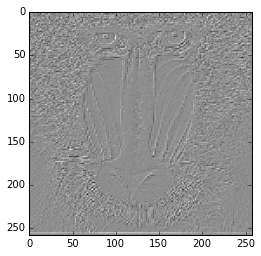

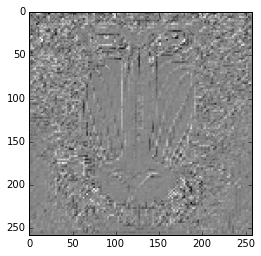

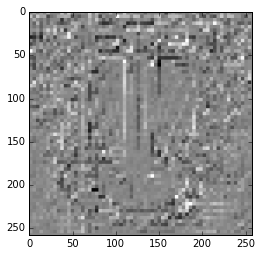

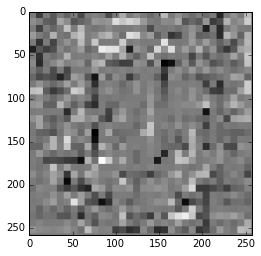

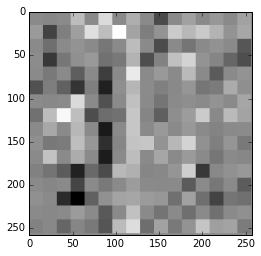

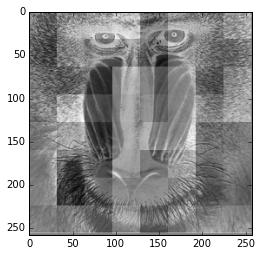

In [11]:
#Generate Laplace Pyramid for Mandrill Image
ml1,ml2,ml3,ml4,ml5 = generateLaplace(img_m,md1,md2,md3,md4,md5)
#Reconstruct Mandrill Image
mr = reconstruct(md1,ml1,ml2,ml3,ml4,ml5)
plt.figure(1)
plt.imshow(ml1,cmap="gray")
plt.figure(2)
plt.imshow(ml2,cmap="gray")
plt.figure(3)
plt.imshow(ml3,cmap="gray")
plt.figure(4)
plt.imshow(ml4,cmap="gray")
plt.figure(5)
plt.imshow(ml5,cmap="gray")
plt.figure(6)
plt.imshow(mr,cmap="gray")

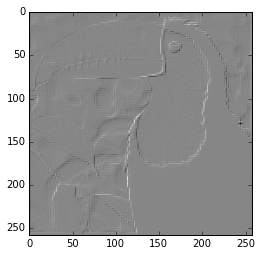

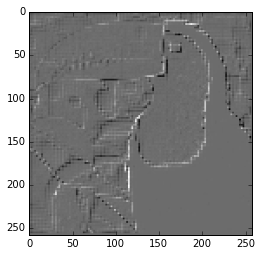

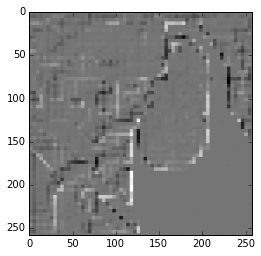

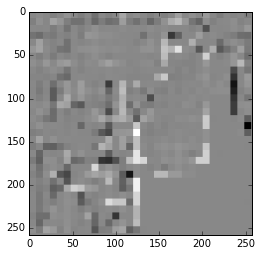

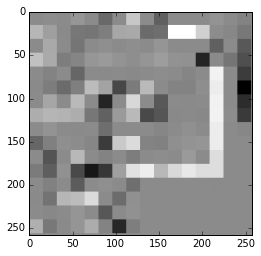

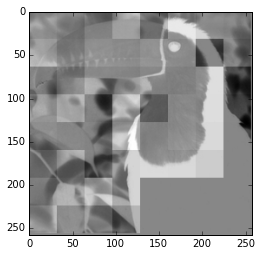

In [12]:
#Generate Laplace Pyramid for Mandrill Image
tl1,tl2,tl3,tl4,tl5 = generateLaplace(img_t,td1,td2,td3,td4,td5)
#Reconstruct Toucan Image
tr = reconstruct(td1,tl1,tl2,tl3,tl4,tl5)
plt.figure(1)
plt.imshow(tl1,cmap="gray")
plt.figure(2)
plt.imshow(tl2,cmap="gray")
plt.figure(3)
plt.imshow(tl3,cmap="gray")
plt.figure(4)
plt.imshow(tl4,cmap="gray")
plt.figure(5)
plt.imshow(tl5,cmap="gray")
plt.figure(6)
plt.imshow(tr,cmap="gray")


#4)Image enhancement method

In [20]:
#Gaussian 4 level 
def applyGauss4(img,h,w):
    m1 = np.zeros((h+2,w+2))
    m2 = np.zeros((h+2,w+2)) 
    m3 = np.zeros((h+2,w+2))
    m4 = np.zeros((h+2,w+2))
        
    for i in range(h):
        for j in range(w):
            m1[i][j] = img[i-(i%2)][j-(j%2)][0]
            m2[i][j] = img[i-(i%4)][j-(j%4)][0]
            m3[i][j] = img[i-(i%8)][j-(j%8)][0]
            m4[i][j] = img[i-(i%16)][j-(j%16)][0]
    
    return m1,m2,m3,m4



In [28]:
#Laplace Pyramid 4 level
def generateLaplace4(img,m1,m2,m3,m4):
    h, w, d = original_shape = tuple(img.shape)
    l1 = np.zeros((h+2,w+2))
    l2 = np.zeros((h+2,w+2)) 
    l3 = np.zeros((h+2,w+2))
    l4 = np.zeros((h+2,w+2))  
    
    for i in range(h):
        for j in range(w):
            l1[i][j] = m1[i][j] - img[i][j][0]
            l2[i][j] = m2[i][j] - m1[i][j]
            l3[i][j] = m3[i][j] - m2[i][j]
            l4[i][j] = m4[i][j] - m3[i][j] 
    
    return l1,l2,l3,l4

In [29]:
#Reconstruct 4 level
def reconstruct4(m1,l1,l2,l3,l4):
    h, w = original_shape = tuple(m1.shape)
    img_new = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            img_new[i][j] = l1[i][j] + l2[i][j] + l3[i][j] + l4[i][j] 
    
    return img_new

In [35]:
#Reconstruct 4 level
def improve(m1,l1,l2,l3,l4):
    h, w = original_shape = tuple(m1.shape)
    img_new = np.zeros((h,w))
    for i in range(h):
        for j in range(w):
            img_new[i][j] = l1[i][j] + l2[i][j] + l3[i][j] + l4[i][j] - m1[i][j]
    
    return img_new

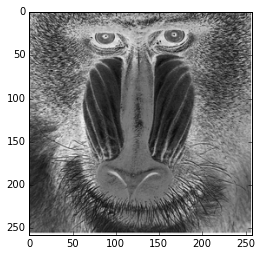

In [39]:
#Generate Improved Laplace Pyramid for Mandrill Image
ml1,ml2,ml3,ml4 = generateLaplace4(img_m,md1,md2,md3,md4)
#Reconstruct Mandrill Image
mr = improve(md4,ml1,ml2,ml3,ml4)
plt.imshow(mr,cmap="gray")

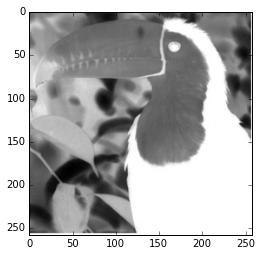

In [40]:
#Generate Improved Laplace Pyramid for Toucan Image
tl1,tl2,tl3,tl4 = generateLaplace4(img_t,td1,td2,td3,td4)
#Reconstruct Mandrill Image
tr = improve(td4,tl1,tl2,tl3,tl4)
plt.imshow(tr,cmap="gray")